# AULA 2 - COMPARANDO MODELOS DE REGRESSÃO
# TÓPICOS:  
# - Regressão Linear
# - Random Forest 
# - XGBoost
# Trabalhando com o dataset fictício houseprices: variáveis de casas que influenciam o preço

ETAPA 1: Instalando o pacote kagglehub


## Comments:
# O kagglehub é uma biblioteca oficial do Kaggle que permite baixar datasets, modelos e notebooks diretamente do Kaggle para dentro do seu ambiente Python (como Jupyter Notebook, Google Colab ou VS Code), sem precisar fazer o download manual pelo site.
# Kaggle é uma plataforma online de ciência de dados e aprendizado de máquina (mantida pelo Google) usada por pesquisadores, estudantes e profissionais do mundo todo para analisar dados, desenvolver modelos e competir em desafios de machine learning

In [1]:
!pip install kagglehub[pandas-datasets]


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Comments:
# O comando import serve para importar bibliotecas

ETAPA 2: Importar o pacote kagglehub e adaptador KaggleDatasetAdapter, que define o formato em que o arquivo será carregado

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

ETAPA 3: Download e carregamento do dataset

In [3]:
# Set the path to the file you'd like to load
file_path = "train.csv" # arquivo que será carregado de dentro do dataset 

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,  # formato de carregamento - define que o dataset será carregado como DataFrame
  "lespin/house-prices-dataset", # nome do dataset no Kaggle
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head()) # exibe as primeiras linhas do dataset

C:\Users\ferna\AppData\Local\Temp\ipykernel_26432\3910650535.py:5: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   

## Comments:
# O comando df.head() também exibe as primeiras 5 linhas do DataFrame, mas os resultados são exibidos no formato de uma tabela bonita

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Comments:
# O comando df.tail() exibe as últimas 5 linhas do DataFrame em um formato de uma tabela bonita

In [5]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


## Comments:
# o comando df.describe() gera um resumo estatístico descritivo das colunas numéricas do seu DataFrame

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Comments:
# O comando df.info() exibe um resumo geral da estrutura do seu DataFrame contendo informações do tipo:
# Número total de linhas e colunas
# Nome de cada coluna
# Número de valores não nulos em cada coluna
# Tipo de dado de cada coluna (int64, float64, object, bool, datetime64, etc.)
# Uso aproximado de memória

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

ETAPA 4: Importar as bilitoecas necessárias

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



In [9]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


ETAPA 5: Pré-processamento dos dados

## Comments:
# Remover as variáveis com muitos missing values
# A função drop é usada para remover linhas ou colunas

In [10]:

df = df.drop(columns=['Id', 'Alley', 'PoolQC', 'MasVnrType', 'MiscFeature', 'Fence', 'FireplaceQu'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## Comments:
# Agora iremos substituir dados ausentes (NaN, Not a Number)
# Os comandos "df.fillna(df.median(numeric_only=True), inplace=True)" e "df.fillna('None', inplace=True)" devem ser usados em sequência para tratar todas as colunas do DataFrame, pois:
# A primeira linha preenche colunas numéricas com a mediana (valor central, mais robusto que a média).
# A segunda linha preenche colunas de texto/categóricas com 'None', evitando erros em análises ou modelagem.

# a função .fillna é usada para preencher valores ausentes 
# a função .median(numeric_only=True) calcula a mediana de cada coluna numérica, ignorando texto

# Depois da etapa anterior, ainda podem existir colunas não numéricas (texto, categóricas) com NaN.
# O comando df.fillna('None', inplace=True) preenche esses valores ausentes com o texto 'None'.

# O comando inplace=True serve para indicar que as alterações devem ser aplicadas diretamente no DataFrame original, sem criar uma cópia.


In [11]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna('None', inplace=True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## Comments:
# Transformar todas as variáveis categóricas em números (variável binária, 0 e 1)
# Transformar todas as colunas categóricas (de texto) do DataFrame em números inteiros, usando o LabelEncoder, para que possam ser usadas em modelos matemáticos.
# Modelos de machine learning geralmente não aceitam texto, apenas números, portanto precisamos “traduzir” as categorias em valores numéricos.

# o comando df.select_dtypes(include=['object']) seleciona todas as colunas do DataFrame que são do tipo “object”, ou seja, colunas com texto (strings)
# .columns --> retorna apenas os nomes dessas colunas
# for col in col_cats --> cria um loop que percorre cada coluna categórica (texto) da lista col_cats
# LabelEncoder --> cria um codificador para transformar texto em números inteiros
# df[col] = Le.fit_transform(df[col]) --> substitui os textos da coluna pelos números correspondentes

In [13]:
col_cats = df.select_dtypes(include=['object']).columns
for col in col_cats:
    Le = LabelEncoder()
    df[col] = Le.fit_transform(df[col])

## Comments:
# Verificar se há missing values no conjunto de dados

In [14]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

ETAPA 6: Separar dados de treinamento e teste

## Comments:
# A variável SalePrice precisa ser eliminada porque ela é a nossa variável resposta 
# O comando X = df.drop(columns=['SalePrice']) cria um novo DataFrame chamado X, que contém todas as colunas do df exceto 'SalePrice'. Ou seja, X representa as variáveis independentes (ou preditoras) — os dados que o modelo vai usar para tentar prever algo.
# O comando y = df['SalePrice'] cria uma série (coluna isolada) chamada y que contém apenas 'SalePrice'. Essa é a variável alvo (ou dependente), ou seja, o valor que o modelo vai tentar prever com base nas outras colunas.


In [ ]:
# Definir as variáveis X e y
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

## Comments:
# A função train_test_split() do pacote sklearn.model_selection divide os dados em dois conjuntos: treinamento (X_train, y_train) e teste (X_test, y_test)
# test_size=0.25 --> define que 25% dos dados serão usados para teste, e os outros 75% para treino
# random_state=42 --> garante que a divisão seja sempre igual se você rodar o código de novo (reprodutibilidade). Ele funciona como seed(123) no R onde garante reprodutibilidade, isto é, se eu rodar várias vezes, eu terei o mesmo output

In [16]:
# Separar dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ETAPA 7: Modelo de Regressão Linear

A- Criação do modelo e treinamento

## Comments:
# model = LinearRegression() --> cria um modelo de Regressão Linear, ou seja, um modelo que tentará ajustar uma reta (ou hiperplano) que melhor explica a relação entre as variáveis preditoras (X) e a variável alvo (y).
# model.fit(X_train, y_train) --> ensina o modelo a partir dos dados de treinamento (X_train, y_train).
# o método .fit() é responsável por ajustar os coeficientes da regressão linear para minimizar o erro entre os valores previstos e os reais. Ou seja:
# - o modelo observa os pares de dados (X_train, y_train);
# - calcula os coeficientes (pesos) que melhor explicam a relação entre as variáveis;
# - armazena esses coeficientes dentro do objeto model.
# Agora, o modelo está treinado e pronto para fazer previsões com .predict().

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

B- Previsão (ou inferência)

## Comments:
# Treinamento/Validação
# o método .predict() usa o modelo já treinado (model) para estimar os valores da variável alvo (y) com base nos dados de teste (X_test).
# O resultado (y_pred) é um vetor/array com as previsões do modelo — ou seja, os valores de SalePrice que o modelo acredita que cada casa (no conjunto de teste) vale.

## Resumindo:
# Treinamento (fit): ensina o modelo com dados conhecidos (X_train, y_train); fit() = o modelo aprende a relação entre variáveis.
# Previsão (predict): usa o modelo treinado para estimar novos valores (X_test); predict() = o modelo aplica o que aprendeu para prever novos casos.

In [18]:
y_pred = model.predict(X_test)

C- Avaliar desempenho do modelo (métricas)

## Comments: 
# Durante a avaliação do desempenho do modelo será avaliado o quão boas foram as previsões (y_pred) em relação aos valores reais (y_test)
# As principais métricas de avaliação do modelo são: MAE (erro absoluto médio), MSE (erro quadrático médio) e R2 (coeficiente de determinação)
# - MAE indica quanto o modelo erra, em média, na mesma unidade da variável-alvo --> quanto menor o MAE, melhor o modelo.
# - MSE mede a variância do erro — penaliza erros grandes mais fortemente (porque o erro é elevado ao quadrado) --> quanto menor o MSE, melhor o ajuste (costuma ser um valor muito alto e não muito intuitivo).
# - R2 mede o quanto das variações da variável alvo (y) é explicada pelo modelo --> quanto mais próximo de 1, melhor o modelo.
# - RMSE (Root Mean Squared Error) é a raiz quadrada do MSE --> quanto menor, melhor o modelo (é um valor mais intuitivo que o MSE).

# o f permite que exiba o resultado indicado entre {}
# Está explicando 84% do preço das casas com base nas variáveis presentes no conjunto de dados

In [19]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MAE: 21503.551898549063
MSE: 1095293421.903072
RMSE: 33095.21750801877
R2: 0.8436480940784026


D- Comparar previsões com valores reais

## Comments:
# Durante essa etapa, ele irá pegar dados do grupo teste (25% dos dados que não foram usados durante o treinamento) e então, ele vai comparar o valor que previsto pelo modelo com o valor real para esses dados que não foram usados durante o treinamento. Se o valor previsto for próximo ao valor real, então o modelo aprendeu bem a relação entre as variáveis e tem poder de generalização.

## Atenção:
# Se o modelo acerta muito bem no treino, mas mal no teste, ele sofreu overfitting, isto é, decorou os dados em vez de aprender o padrão.
# Se o modelo vai bem em ambos, então ele generaliza bem (é o que queremos).

In [20]:
comparacao = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
print(comparacao.head())

        Real       Previsto
892   154500  148166.662619
1105  325000  320344.325524
413   115000  113041.383496
522   159000  178969.664516
1036  315500  314018.374468


E- Gráfico de dispersão

## Comments:
# a linha vermelha é o que seria uma previsão perfeita. Quanto mais próximos os pontos estiverem dessa linha, melhor o modelo.

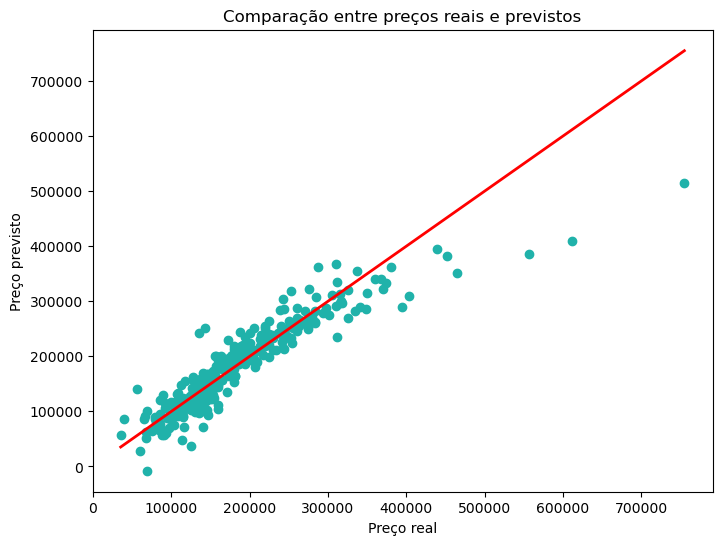

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='LightSeaGreen')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2) # posso remover esse comando se eu não quiser exibir a diaginal vermelha (linha de referência ideal)
plt.xlabel("Preço real")
plt.ylabel("Preço previsto")
plt.title("Comparação entre preços reais e previstos")
plt.savefig("real_vs_predicted.tiff", dpi=600)
plt.show()

F- Plotando subplots

## Comments:
# Gráfico de dispersão - “Preço real vs. preço previsto”: mostra a capacidade de generalização do modelo — se ele prevê bem ou não os valores reais; é o gráfico mais direto para avaliar a precisão global do modelo.

# Gráfico de resíduos — “Distribuição dos erros”: Os resíduos são as diferenças entre o valor real e o valor previsto (erro = y_real - y_pred).
# Um bom modelo tem resíduos:
# - Distribuídos simetricamente em torno de zero;
# - Sem “caudas” muito grandes (sem muitos erros extremos).
# - Se os resíduos são positivos e negativos em proporções parecidas, indica que o modelo não tem viés.
# - Se houver uma assimetria (por exemplo, muitos resíduos positivos), o modelo tende a subestimar ou superestimar os valores.

# Gráfico das variáveis — “Importância das variáveis”: exibe as 10 variáveis mais importantes para o modelo, com base no valor absoluto dos coeficientes (model.coef_).

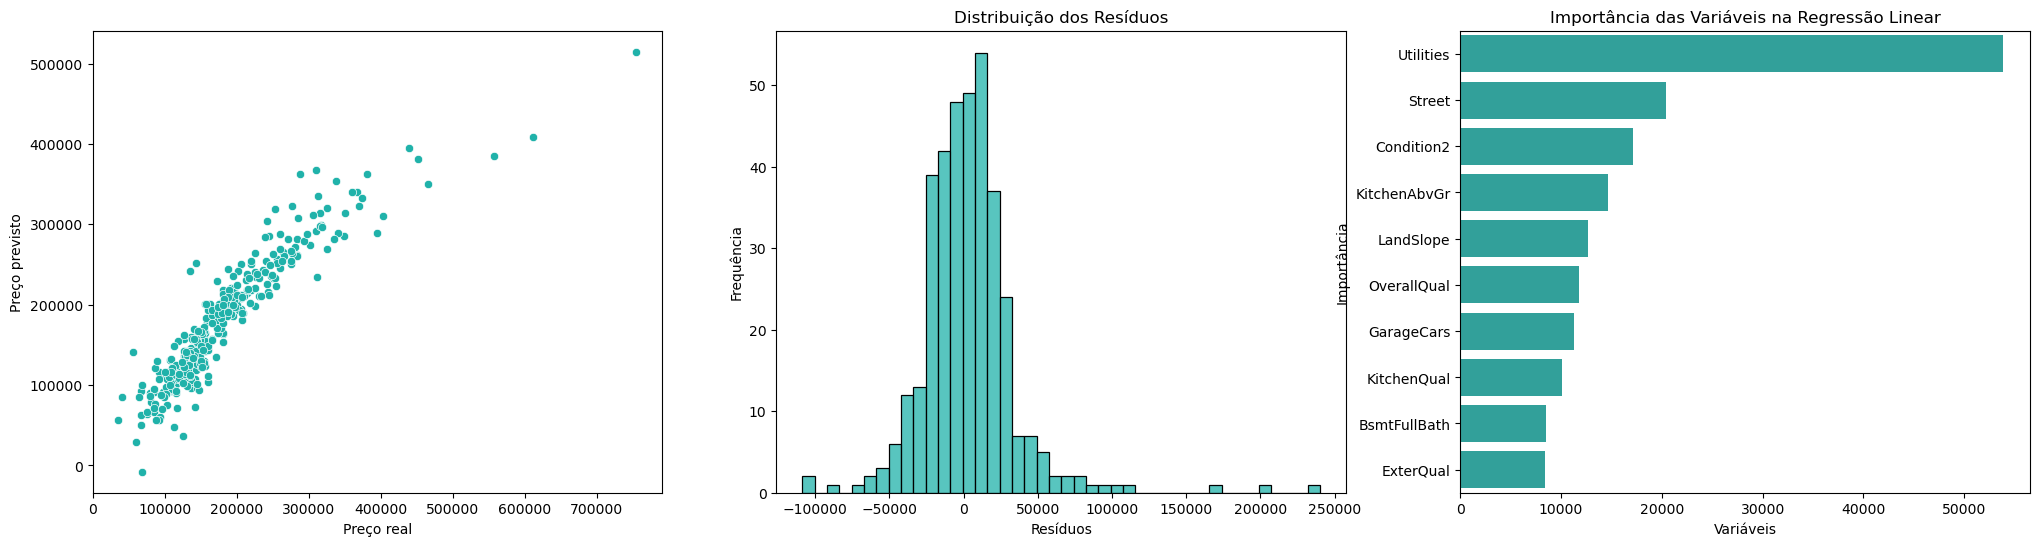

In [22]:
plt.figure(figsize=(25,6)) 

# Gráfico de dispersão - “Preço real vs. preço previsto”
plt.subplot(1, 3, 1) # número de linhas, número de colunas, posição desse plot no painel
sns.scatterplot(x=y_test, y=y_pred, color='LightSeaGreen')
plt.xlabel("Preço real")
plt.ylabel("Preço previsto")
plt.title("")
plt.savefig("real_vs_predicted.tiff", dpi=600)


# Gráfico de resíduos
plt.subplot(1, 3, 2) 
residuals = y_test - y_pred
sns.histplot(residuals, color='LightSeaGreen')
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Distribuição dos Resíduos")
plt.savefig("residuals.tiff", dpi=600)


# Gráfico das variáveis
plt.subplot(1, 3, 3) 
importancia = model.coef_
variaveis = X.columns
# Obter os índices das 10 variáveis mais importantes
coef_df = pd.DataFrame({'Variável': variaveis, 'Importância': np.abs(importancia)})
top_10 = coef_df.nlargest(10, 'Importância')
sns.barplot(x=top_10['Importância'], y=top_10['Variável'], color='LightSeaGreen')
plt.xlabel("Variáveis")
plt.ylabel("Importância")
plt.title("Importância das Variáveis na Regressão Linear")

plt.savefig("graficos_regressao_linear.tiff", dpi=600)
plt.show()

ETAPA 8: Modelo Random Forests (Árvores Aleatórias)

In [23]:
# Importar o modelo de regressão chamado Random Forest da biblioteca scikit-learn
from sklearn.ensemble import RandomForestRegressor

A- Criação do modelo e treinamento

In [24]:
rf = RandomForestRegressor(n_estimators=999, random_state=42)
rf.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=999, random_state=42)

B- Previsão (ou inferência)

In [25]:
y_pred = rf.predict(X_test) 

C- Avaliar desempenho do modelo (métricas)

In [26]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MAE: 16745.508086168364
MSE: 723299772.6873904
RMSE: 26894.23307490642
R2: 0.8967497697412999


D- Comparar previsões com valores reais

In [27]:
comparacao = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
print(comparacao.head())

        Real       Previsto
892   154500  140879.979980
1105  325000  326451.693694
413   115000  118835.190190
522   159000  164573.407407
1036  315500  319195.867868


E- Plotando subplots

Text(0.5, 1.0, 'Top 10 Variáveis Mais Importantes')

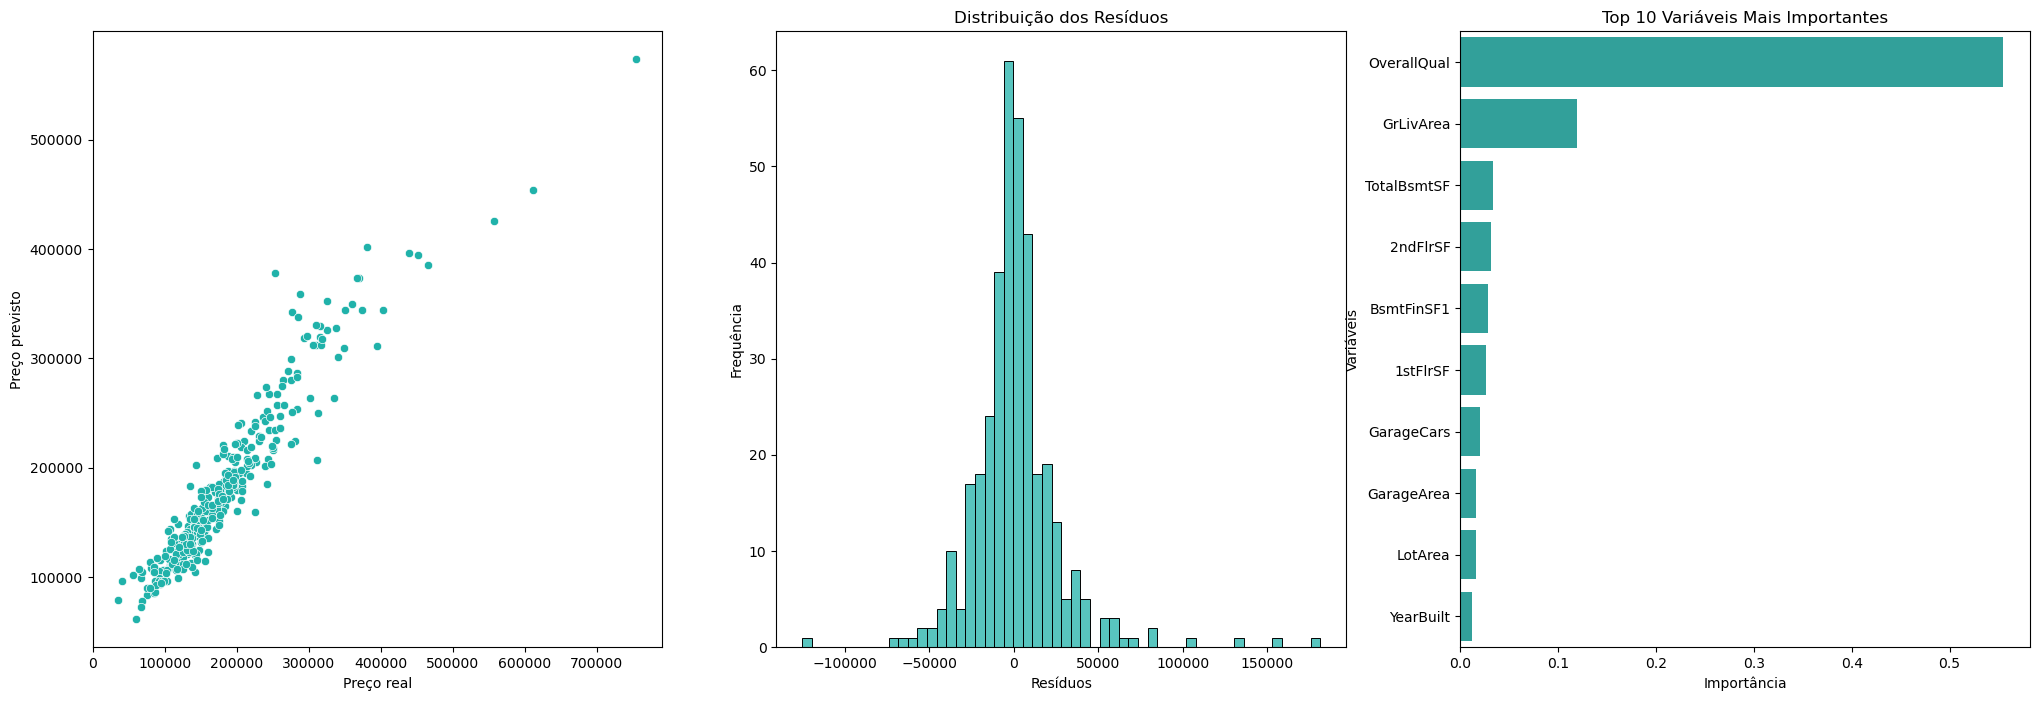

In [28]:
plt.figure(figsize=(25,8))

# Gráficos de dispersão - “Preço real vs. preço previsto”
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred, color='LightSeaGreen')
plt.xlabel("Preço real")
plt.ylabel("Preço previsto")

# Gráfico de resíduos
plt.subplot(1, 3, 2)
residuals = y_test - y_pred
sns.histplot(residuals, color='LightSeaGreen')
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Distribuição dos Resíduos")

# Gráfico de importância das 10 variáveis mais importantes
plt.subplot(1, 3, 3)
importances = rf.feature_importances_
variaveis = X.columns
coef_df = pd.DataFrame({'Variável': variaveis, 'Importância': np.abs(importances)})
top_10 = coef_df.nlargest(10, 'Importância')
sns.barplot(x=top_10['Importância'], y=top_10['Variável'], color='LightSeaGreen')
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.title("Top 10 Variáveis Mais Importantes")


ETAPA 9: Modelo XGBoost

In [29]:
# Instalar a biblioteca XGBoost
!pip install xgboost


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
# Importar o pacote XGBoost
from xgboost import XGBRegressor

A- Criação do modelo e treinamento

In [31]:
xgb = XGBRegressor(n_estimators=999, random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=999,
             n_jobs=None, num_parallel_tree=None, ...)


B- Previsão (ou inferência)


In [32]:
y_pred = xgb.predict(X_test)

C- Avaliar desempenho do modelo (métricas)

In [33]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE:{mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MAE: 18069.796875
MSE:774043593.3973235
RMSE: 27821.638941610243
R2: 0.8895061463221465


D- Comparar previsões com valores reais

In [34]:
comparacao = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
print(comparacao.head())

        Real       Previsto
892   154500  143891.546875
1105  325000  360090.812500
413   115000  116296.843750
522   159000  178807.500000
1036  315500  329600.125000


E- Plotando subplots

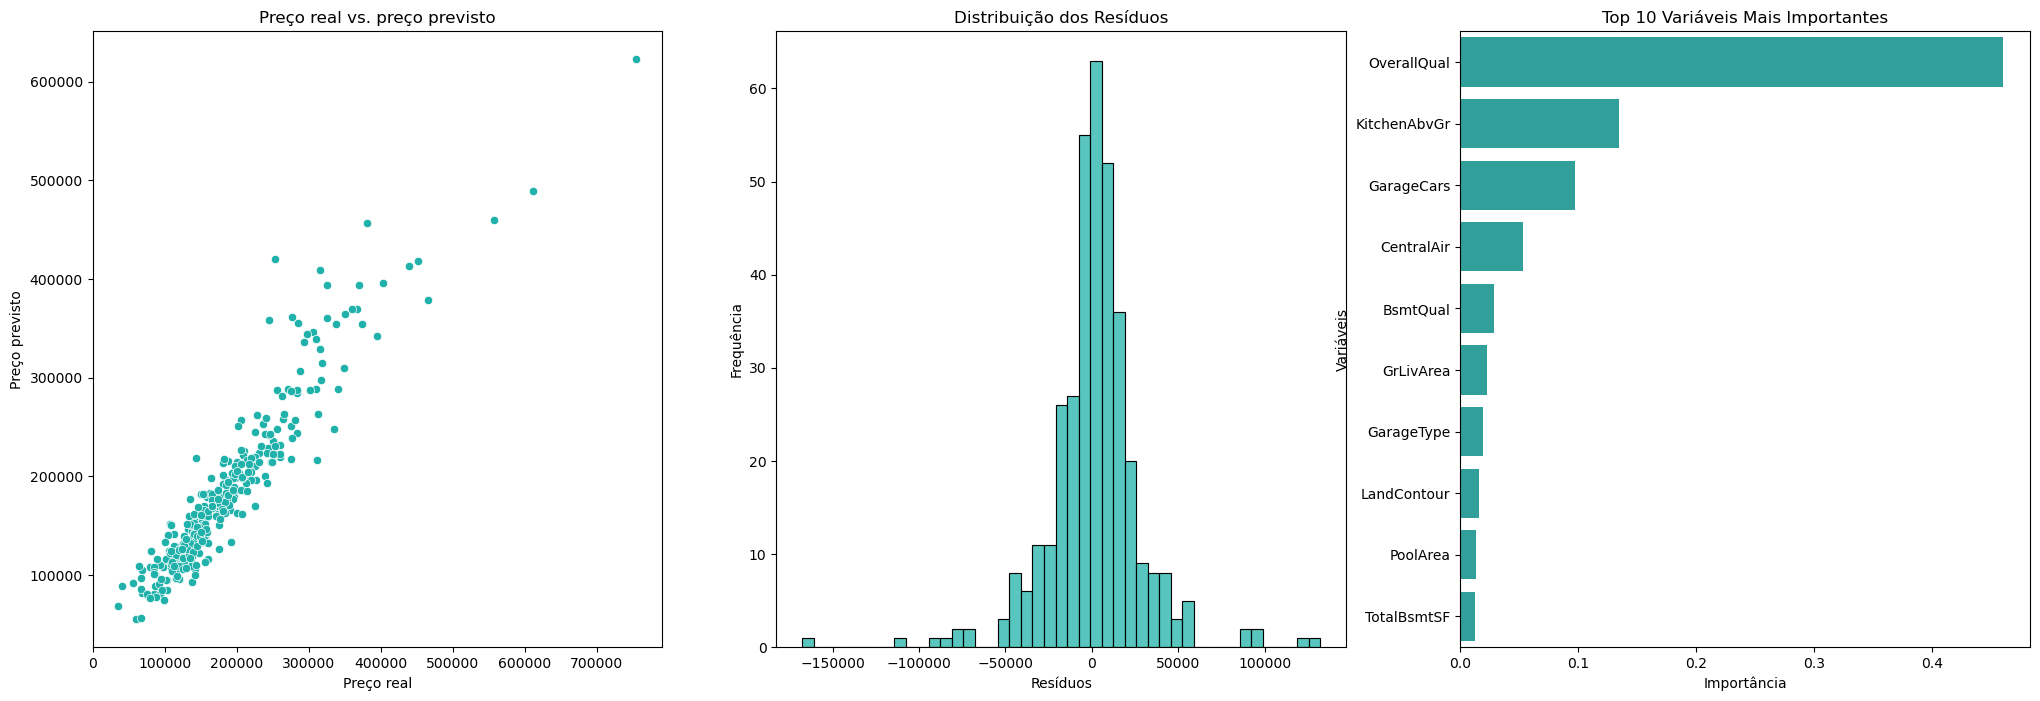

In [35]:
plt.figure(figsize=(25,8))

#Gráfico de dispersão - “Preço real vs. preço previsto”
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred, color='LightSeaGreen')
plt.xlabel("Preço real")
plt.ylabel("Preço previsto")
plt.title("Preço real vs. preço previsto")

#Gráfico de resíduos
plt.subplot(1, 3, 2)
residuals = y_test - y_pred
sns.histplot(residuals, color='LightSeaGreen')
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.title("Distribuição dos Resíduos")

#Gráficos da importância das 10 variáveis mais importantes
plt.subplot(1, 3, 3)
importances = xgb.feature_importances_
variaveis = X.columns
coef_df = pd.DataFrame({'Variável': variaveis, 'Importância': np.abs(importances)})
top_10 = coef_df.nlargest(10, 'Importância')
sns.barplot(x=top_10['Importância'], y=top_10['Variável'], color='LightSeaGreen')
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.title("Top 10 Variáveis Mais Importantes")

plt.savefig("gráficos_xgboost.tiff", dpi=600)
plt.show()